# **RNN**
A recurrent neural network (RNN) is a class of artificial neural network where connections between units form a directed cycle. This creates an internal state of the network which allows it to exhibit dynamic temporal behavior.

IMDB sentiment classification task

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. IMDB provided a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

You can download the dataset from http://ai.stanford.edu/~amaas/data/sentiment/  or you can directly use 
" from keras.datasets import imdb " to import the dataset.

Few points to be noted:
Modules like SimpleRNN, LSTM, Activation layers, Dense layers, Dropout can be directly used from keras
For preprocessing, you can use required 

In [28]:
#load the imdb dataset 
from keras.datasets import imdb
vocabulary_size = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = vocabulary_size)
print('Loaded dataset with {} training samples, {} test samples'.format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [29]:
#the review is stored as a sequence of integers. 
# These are word IDs that have been pre-assigned to individual words, and the label is an integer

print('---review---')
print(X_train[20])
print('---label---')
print(y_train[20])

# to get the actual review
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print('---review with words---')
print([id2word.get(i, ' ') for i in X_train[20]])
print('---label---')
print(y_train[20])

---review---
[1, 617, 11, 3875, 17, 2, 14, 966, 78, 20, 9, 38, 78, 15, 25, 413, 2, 5, 28, 8, 106, 12, 8, 4, 130, 43, 8, 67, 48, 12, 100, 79, 101, 433, 5, 12, 127, 4, 769, 9, 38, 727, 12, 186, 398, 34, 6, 312, 396, 2, 707, 4, 732, 26, 1235, 21, 2, 128, 74, 4, 2, 5, 4, 116, 9, 1639, 10, 10, 4, 2, 2, 186, 8, 28, 77, 2586, 39, 4, 4135, 2, 7, 2, 2, 50, 161, 306, 8, 30, 6, 686, 204, 326, 11, 4, 226, 20, 10, 10, 13, 258, 14, 20, 8, 30, 38, 78, 15, 13, 1498, 91, 7, 4, 96, 143, 10, 10, 2, 2, 144, 3261, 27, 419, 11, 902, 29, 540, 887, 4, 278]
---label---
0
---review with words---
['the', 'running', 'this', 'lily', 'movie', 'and', 'as', 'monster', 'do', 'on', 'it', 'her', 'do', 'for', 'have', 'lost', 'and', 'to', 'one', 'in', 'character', 'that', 'in', 'of', 'here', 'out', 'in', 'can', 'what', 'that', 'after', 'also', 'think', 'entire', 'to', 'that', 'end', 'of', 'using', 'it', 'her', 'straight', 'that', 'horror', 'keep', 'who', 'is', 'during', 'doing', 'and', 'silly', 'of', 'oscar', 'he', 'surpr

In [30]:
#pad sequences (write your code here)
from keras.preprocessing import sequence
max_words = 400
X_train = sequence.pad_sequences(X_train, max_words)
X_test = sequence.pad_sequences(X_test, max_words)

In [31]:
def DefineModel():
    
    model.add(Embedding(vocabulary_size, 32, input_length=max_words))
    model.add(SimpleRNN(100))
    model.add(Dense(1, activation='sigmoid')) 

In [32]:
#design a RNN model (write your code)

from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN

model=Sequential()
DefineModel()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 32)           160000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               13300     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 173,401
Trainable params: 173,401
Non-trainable params: 0
_________________________________________________________________
None


In [62]:
#train and evaluate your model
#choose your loss function and optimizer and mention the reason to choose that particular loss function and optimizer
# use accuracy as the evaluation metric

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='Hinge', optimizer='adam', metrics=['accuracy'])
model.compile(loss='Hinge', optimizer='RMSprop', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

For the following reasons we choose to compare with cross entropy loss and Hinge loss and ADAM and RMSProp optimizers.  

#### Loss
Cross Entropy Loss: 
1. A loss funciton is a measure of the system performance, we would like to update weights such that the loss is minimized. 
2. Entropy of a Random variable is the level of uncertainity inherent in the outcome of the model, it can be interpreted as the minimizing the dissimilarity between the empirical distribution of training data and the the distribution induced by the model. 
4. For gradient based learning approaches, the logarithm in the loss function can undo any unnecessary exponential behaviour caused by some activation function. 
3. Cross entropy is robust to outliers and can lead to stable gradients. 

Hinge:
1. Hinge loss is also commonly used for classification purpose. 
2. It is a convex funcntion. 
3. Will lead to competative results with binary cross entropy. 

#### Optimizer

ADAM

1. ADAM is an improved replacement to the SGD method.
2. It combined methods from ADAGRAD and RMSProp and can handle noisy gradients.
3. It is relatively simple to configure and the default parameters perform well in most cases

RMSProp:

1. It aims to maintain a moving (discounted) average of the square of gradients
2. It divides the gradient by the root of the average. 
3. It will lead to good benchmarking against ADAM. 

In [63]:
batch_size = 100
num_epochs = 5

X_valid, y_valid = X_train[:batch_size], y_train[:batch_size]
X_train_data, y_train_data = X_train[batch_size:], y_train[batch_size:]
model.fit(X_train_data, y_train_data, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
249/249 [==============================] - 24s 94ms/step - loss: 0.7121 - accuracy: 0.7955 - val_loss: 0.8359 - val_accuracy: 0.7700
Epoch 2/5
249/249 [==============================] - 23s 93ms/step - loss: 0.6595 - accuracy: 0.8476 - val_loss: 0.8102 - val_accuracy: 0.7800
Epoch 3/5
249/249 [==============================] - 23s 93ms/step - loss: 0.6322 - accuracy: 0.8736 - val_loss: 0.8119 - val_accuracy: 0.7600
Epoch 4/5
249/249 [==============================] - 23s 93ms/step - loss: 0.6349 - accuracy: 0.8694 - val_loss: 0.7766 - val_accuracy: 0.8100
Epoch 5/5
249/249 [==============================] - 23s 93ms/step - loss: 0.6310 - accuracy: 0.8742 - val_loss: 0.8283 - val_accuracy: 0.7500


In [22]:
#evaluate the model using model.evaluate()
accuracies = model.evaluate(X_test, y_test, verbose=0)

print( 'Accuracy on Test Data')
print( accuracies[1])

Accuracy on Test Data
0.8506399989128113


# **LSTM**

Instead of using a RNN, now try using a LSTM model and compare both of them. Which of those performed better and why ?


In [23]:
def DefineLSTM():
    
    model.add(Embedding(vocabulary_size, 32, input_length=max_words))
    model.add(LSTM(100))
    model.add(Dense(1, activation='sigmoid')) 

In [24]:
model=Sequential()
DefineLSTM()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 32)           160000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='Hinge', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='Hinge', optimizer='RMSprop', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


In [26]:
model.fit(X_train_data, y_train_data, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=num_epochs)

Epoch 1/5
249/249 [==============================] - 46s 178ms/step - loss: 0.9560 - accuracy: 0.5631 - val_loss: 0.8021 - val_accuracy: 0.7700
Epoch 2/5
249/249 [==============================] - 46s 184ms/step - loss: 0.7298 - accuracy: 0.7831 - val_loss: 0.9356 - val_accuracy: 0.6400
Epoch 3/5
249/249 [==============================] - 46s 183ms/step - loss: 0.6714 - accuracy: 0.8343 - val_loss: 0.7426 - val_accuracy: 0.8500
Epoch 4/5
249/249 [==============================] - 47s 188ms/step - loss: 0.6455 - accuracy: 0.8578 - val_loss: 0.6644 - val_accuracy: 0.9300
Epoch 5/5
249/249 [==============================] - 46s 185ms/step - loss: 0.6233 - accuracy: 0.8784 - val_loss: 0.6772 - val_accuracy: 0.9000


In [27]:
#evaluate the model using model.evaluate()
accuracies = model.evaluate(X_test, y_test, verbose=0)
print( 'Accuracy on Test Data')
print( accuracies[1])

Accuracy on Test Data
0.8606399893760681


Perform Error analysis and explain using few examples.

It is observed that LSTMs have an improved preformance over RNN for the following reasons 

1. LSTM include a memory cell that can retain information for longer periods of time, hence can learn long term temporal dependencies. 
2. Furthermore a set of gates are used to control when information enters memory and when it is forgotten. 
3. It can also handel the problems of vanishing and exploding gradients, over longer ranges. 

Examples and Expermiments:

1. The LSTMs seems to show an improved performance over RNN, experminets were conducted by varying the number of epochs, loss function and optimizer. 
2. With increase in epochs the accuracy increased, LSTM accuracy was higher for every time.
3. When binary cross entropy was changed to MSE the accuracy was lower for both (LSTM and RNN in comparision to cross entropy) but LSTM had a higher accuracy in comparision to RNN. 
4. Replacing ADAM with RMSProp LSTM achieved higher accuracy. 


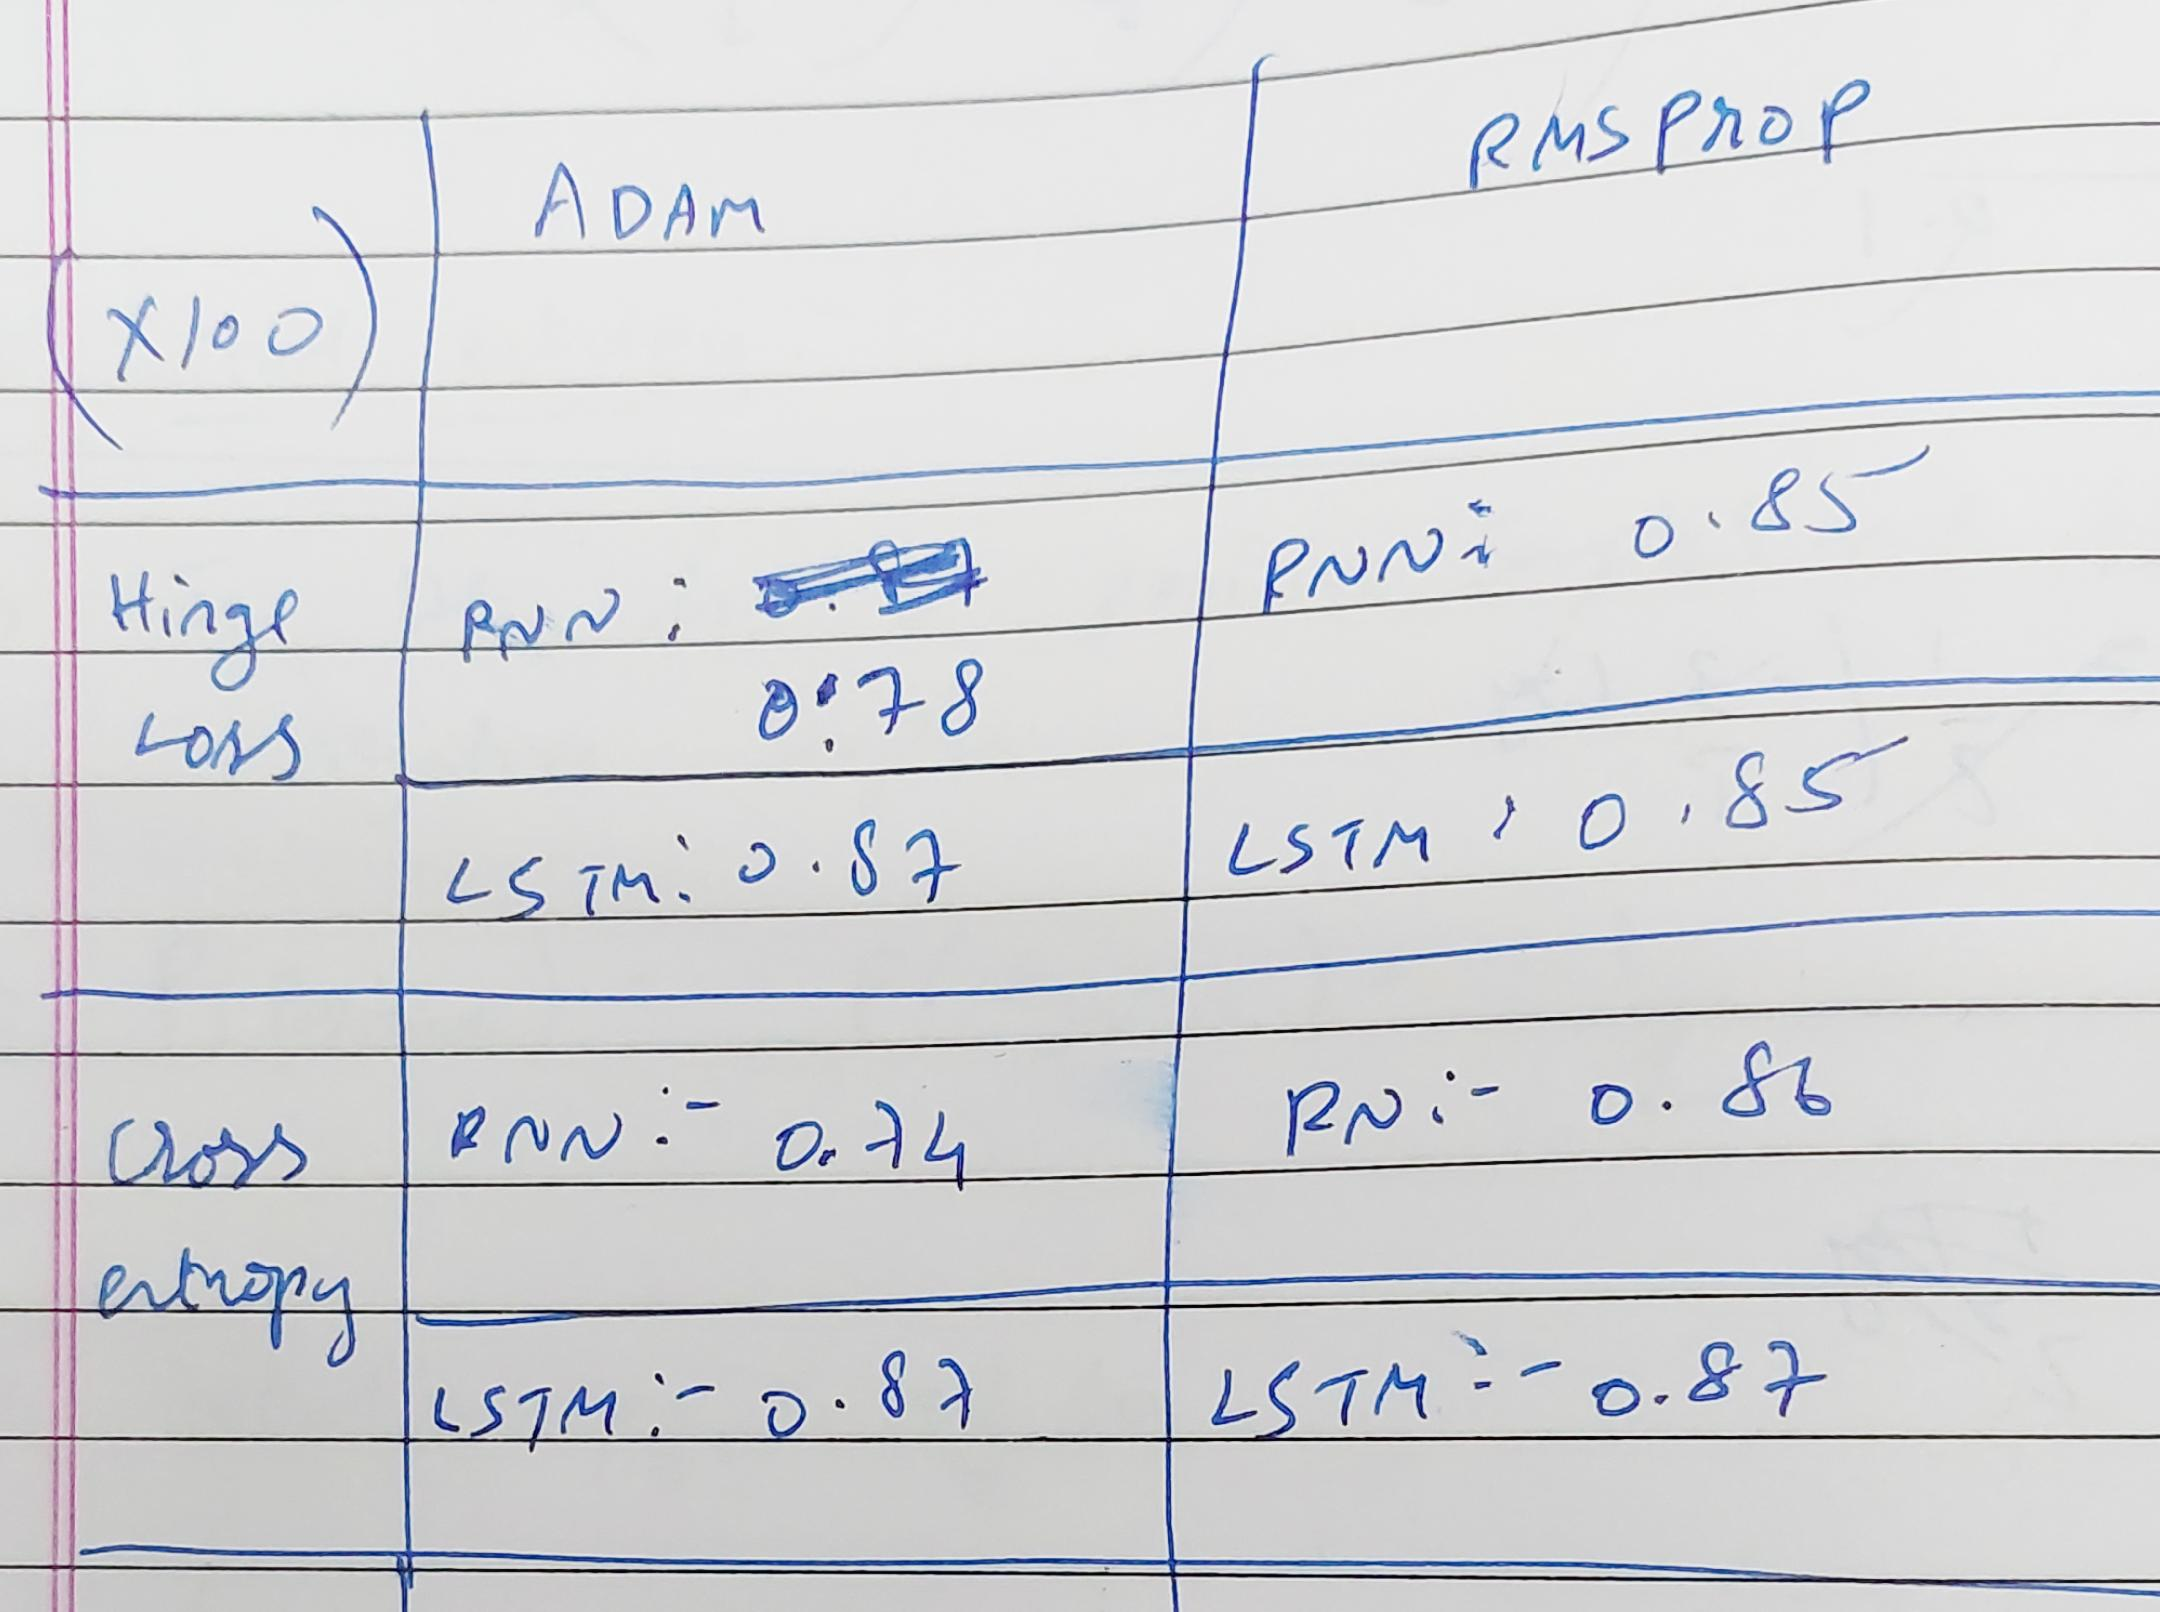

In [61]:
from IPython.display import Image
Image("results.jpg")

In [59]:
preds =  model.predict(X_test)

In [60]:
print(preds[2])
print(y_test[2])

[0.0575572]
1


In [57]:
id_to_word = {value:key for key,value in word2id.items()}
print([id2word.get(i) for i in X_test[2]])


['and', 'except', 'to', 'de', 'and', 'br', 'of', 'you', 'available', 'but', 'hours', 'animals', 'showing', 'br', 'of', 'and', 'than', 'dead', 'white', 'splatter', 'waiting', 'film', 'and', 'to', 'and', 'this', 'documentary', 'in', '3', 'and', 'of', 'accents', 'and', 'br', 'of', 'ann', 'i', 'i', 'comes', '9', 'it', 'place', 'this', 'is', 'and', 'of', 'and', 'and', 'know', 'of', 'and', 'he', 'bonus', 'film', 'were', 'central', 'to', 'one', 'oh', 'is', 'excellent', 'and', 'in', 'can', 'when', 'from', 'well', 'people', 'in', "characters'", 'chief', 'from', 'leaving', 'in', 'and', 'and', 'but', 'is', 'easily', 'of', 'and', 'he', 'and', 'speak', 'this', 'as', 'today', 'paul', 'that', 'against', 'one', 'will', 'actual', 'in', 'could', 'her', 'plot', 'and', 'and', 'few', 'grade', 'and', 'go', 'and', 'but', 'be', 'lot', 'it', 'oliver', 'movie', 'is', 'and', 'picture', 'and', 'feel', 'this', 'of', 'and', 'like', 'different', 'just', 'clichéd', 'girl', 'at', 'finds', 'is', 'and', 'no', 'and', 'gl